# Week 10: Master equations applied to gene expression

<hr>

In [4]:
import numpy as np
import numba
import random
import matplotlib.pyplot as plt
import scipy.integrate

import seaborn as sns
sns.set(font_scale = 1.5, rc={"lines.linewidth":2})

## Returning to gene expression

Returning to our model of gene expression, the differential equation for the number of mRNAs is:

   $$\frac{dm}{dt} = \beta - \gamma m$$
   
where $\beta$ is the rate of production and $\gamma$ is the rate of degradation. We can similarly treat this differential equation as with a Master equation approach, were we will be keep track of all the probabilities of having given numbers of mRNAs over time. This time our "boxes" will be the number of mRNAs rather than a physical position. 

In this scenario, a production event will result in the loss of probability from an $m-1$ number of mRNAs and gain of probability in the $m$ number of mRNAs. Conversely, a degradation event results in the loss of probability from an $m+1$ number of mRNAs and a gain of probability in the $m$ number of mRNAs. All the possible terms are spelled out below. 

## Master equation for constitutive gene expression

The master equation below describes the dynamics of mRNA counts
where $p(m, t)$ is the probability that the cell has $m$ mRNAs at time $t$ and $\Delta t$ is the time increment that we'll use in numerical integration.

$$
\overbrace{p(m, t+\Delta t)}^{\text {new probability }}=
\underbrace{p(m, t)}_{\text {old probability }} +
\overbrace{\beta \Delta t p(m-1, t)}^{\text {production from lower state }} + 
\underbrace{\gamma(m+1) \Delta t p(m+1, t)}_{\text {degradation from upper state }} -
\overbrace{\beta \Delta t p(m, t)}^{\text {production out of this state }} -
\underbrace{\gamma m \Delta t p(m, t)}_{\text {degradation out of this state }},
$$

Like in the case of diffusion, here too we need to specify the boundary conditions for the master equation, namely

$$
\overbrace{p(0, t+\Delta t)}^{\text {new probability }}=
\underbrace{p(0, t)}_{\text {old probability }}+
\overbrace{\gamma \Delta t p(1, t)}^{\text {degradation from upper state }}-
\underbrace{\beta \Delta t p(0, t)}_{\text {production out of this state }}
$$

for $m=0$ (where we aren't allowed to have any degradation) and

$$
\overbrace{p(M, t+\Delta t)}^{\text {new probability }}=
\underbrace{p(M, t)}_{\text {old probability }}+
\overbrace{\beta \Delta t p(M-1, t)}^{\text {production from lower state }}-
\underbrace{\gamma M \Delta t p(M, t)}_{\text {degradation out of this state }}
$$

for the $m=M$, the largest number of mRNAs that we will allow, since can only simulate a finite number of possible mRNA counts. In practice, choosing a value for $M$ that is several times larger than the mean number of mRNAs will be sufficient to ensure accurate estimates.

## Coding it up

Below I give the parameters we will use for the integration. 

In [2]:
# time step
dt = 0.1 # min

# mRNA production rate
r = 0.5 # min^-1

# degradation rate
gamma = 0.1 # min^-1

# max number of mRNAs we will compute probabilities for
M = 20

# number of steps
n_steps = 200

# array to store mRNA probabilities
p = np.zeros([M, n_steps])

# probability at t=0
p [0,0] = 1

Code up the Master equation integration here. Remember to specify the edge cases as well!

Check out the plot of your results over time below:

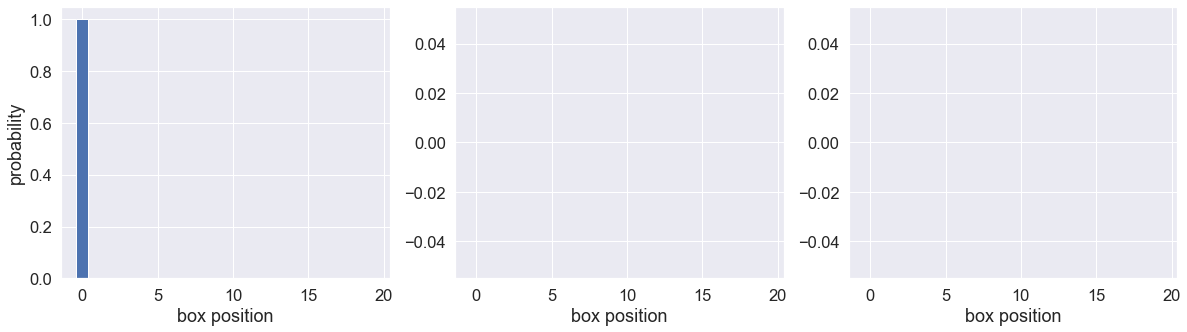

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

ax[0].bar(np.arange(M), p[:,0])
ax[0].set_xlabel("box position")
ax[0].set_ylabel("probability");

ax[1].bar(np.arange(M), p[:,99])
ax[1].set_xlabel("box position")

ax[2].bar(np.arange(M), p[:,199])
ax[2].set_xlabel("box position");